In [1]:
import os 
os.chdir('../') # important if this notebook is not in main but in notebooks folder

from gerda.core.virusPropagationModel import *
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import networkx as nx
import numpy as np
import math
import seaborn as sns
%matplotlib inline

In [46]:
input_folder = '/home/basar/corona_simulations_save/saved_objects/scenario_output/RPM02_Gangelt_big_Ifreq_2.0_close_all_reopen_all_IF03_start_3_1500.000/'

In [47]:
input_list = os.listdir(input_folder)
input_files = [x for x in input_list if x.endswith('pkl')]

In [48]:
test_file = load_simulation_object(input_files[0],folder=input_folder)

In [49]:
for p in list(test_file.people)[10:20]:
    if p.ID:
        print(p.ID, 'inf:', p.stati_times['infection_time'], 'rec:',p.stati_times['recover_time'])

239 inf: nan rec: nan
6487 inf: nan rec: nan
2840 inf: nan rec: nan
10052 inf: nan rec: nan
9525 inf: nan rec: nan
9035 inf: nan rec: nan
1758 inf: nan rec: nan
9036 inf: nan rec: nan
10051 inf: nan rec: nan
1757 inf: nan rec: nan


In [50]:
infectivity_file = open('datafiles/state_transition_probs/infectivity.csv', 'r')
infectivity_dict = {}

for line in infectivity_file.readlines()[1:]:
    line = line.strip('\n')
    line = line.split(',')
    infectivity_dict[int(line[0])]=float(line[1])
for i in np.arange(241,1600,1):
    infectivity_dict[i]=0

In [51]:
infectivities_left_1 = []
infectivities_left_2 = []
timepoint = 1500

for file in input_files[:]:
    tdf = pd.read_pickle('analysis_temp/TIMES_'+file)
    
    #print(tdf)
    
    tdf_short = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<timepoint)]
    tdf_short = tdf_short[tdf_short['recovery_time']>timepoint]
    tdf_short = tdf_short[(tdf_short['death_time'].isna()) | (tdf_short['death_time']>timepoint)]
    #break
    if len(tdf_short)==0:
        #infectivities_left_1.append(0.0)
        continue
    
    tdf_short.drop(columns=['recovery_time','death_time'])
    
    tdf_short['duration_at_reopening']=tdf_short.apply(lambda x: timepoint-x['infection_time'], axis=1)
    tdf_short['infectivity_at_reopening']=tdf_short.apply(lambda x: infectivity_dict[int(x['duration_at_reopening'])], axis=1)
    
    if tdf['infection_time'].isna().sum()>4000:
        #print(tdf['infection_time'].isna().sum())
        infectivities_left_1.append(tdf_short['infectivity_at_reopening'].sum()/len(tdf_short.index))
    else:
        infectivities_left_2.append(tdf_short['infectivity_at_reopening'].sum()/len(tdf_short.index))

In [52]:
infectivities_left_1

[0.0007692307692307692,
 0.00011235955056179776,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0007514450867052024,
 0.00022471910112359551,
 0.0,
 5.1282051282051286e-05,
 0.0020257234726688104,
 0.0,
 0.0,
 4.6296296296296294e-05,
 0.0,
 0.00031249999999999995,
 0.0,
 0.0013664596273291925,
 0.0,
 0.0,
 0.0013333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.849557522123894e-05,
 0.0,
 0.00126984126984127,
 0.0,
 0.0004824561403508772,
 0.00029411764705882356,
 8.849557522123894e-05,
 6.024096385542169e-05,
 0.0004926108374384237,
 0.0,
 0.0006,
 0.0,
 8.695652173913044e-05,
 0.0011382113821138214,
 0.0,
 0.0010309278350515464]

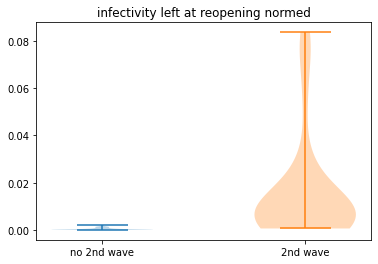

In [53]:
fig = plt.figure()
plt.violinplot([infectivities_left_1], positions=[1])
plt.violinplot([infectivities_left_2], positions=[2])
plt.xticks([1,2],['no 2nd wave', '2nd wave'])
plt.title('infectivity left at reopening normed')
fig.savefig('infectivity_left_at_reopening_normed')

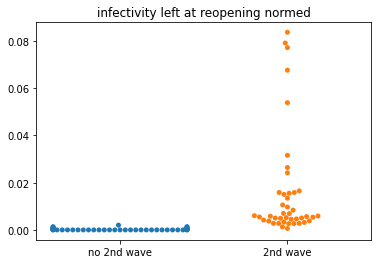

In [54]:
fig = plt.figure()
ax = sns.swarmplot(data=[infectivities_left_1,infectivities_left_2])
ax.set_xticklabels(['no 2nd wave','2nd wave'])
ax.set_xticks([0,1])
plt.title('infectivity left at reopening normed')
fig.savefig('infectivity_left_at_reopening_normed_swarm')

In [58]:
infectivities_left_1 = []
infectivities_left_2 = []
timepoint = 200

for file in input_files[:]:
    tdf = pd.read_pickle('analysis_temp/TIMES_'+file)
    
    tdf_short = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<timepoint)]
    tdf_short = tdf_short[tdf_short['recovery_time']>timepoint]
    tdf_short = tdf_short[(tdf_short['death_time'].isna()) | (tdf_short['death_time']>timepoint)]
    
    if len(tdf_short)==0:
        #infectivities_left_1.append(0.0)
        continue
    
    tdf_short.drop(columns=['recovery_time','death_time'])
    
    tdf_short['duration_at_lockdown']=tdf_short.apply(lambda x: timepoint-x['infection_time'], axis=1)
    tdf_short['infectivity_at_lockdown']=tdf_short.apply(lambda x: infectivity_dict[int(x['duration_at_lockdown'])], axis=1)
    
    if tdf['infection_time'].isna().sum()>4000:
        #print(tdf['infection_time'].isna().sum())
        infectivities_left_1.append(tdf_short['infectivity_at_lockdown'].sum()/len(tdf_short.index))
    else:
        infectivities_left_2.append(tdf_short['infectivity_at_lockdown'].sum()/len(tdf_short.index))

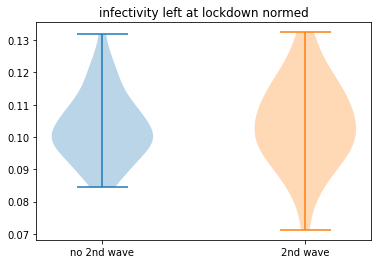

In [59]:
fig = plt.figure()
plt.violinplot([infectivities_left_1], positions=[1])
plt.violinplot([infectivities_left_2], positions=[2])
plt.xticks([1,2],['no 2nd wave', '2nd wave'])
plt.title('infectivity left at lockdown normed')
fig.savefig('infectivity_left_at_lockdown_normed')

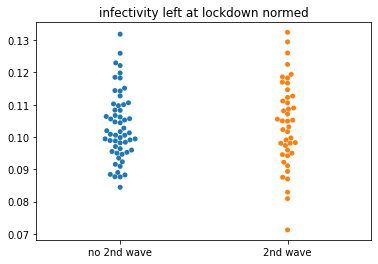

In [60]:
fig = plt.figure()
ax = sns.swarmplot(data=[infectivities_left_1,infectivities_left_2])
ax.set_xticklabels(['no 2nd wave','2nd wave'])
ax.set_xticks([0,1])
plt.title('infectivity left at lockdown normed')
fig.savefig('infectivity_left_at_lockdown_normed_swarm')

In [35]:
#for file in input_files[:]:
    #tdf = pd.read_pickle('analysis_temp/TIMES_'+file)
    
    #print(tdf['infection_time'].isna().sum())
    
    #df_short = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<500)]
    #tdf_short = tdf_short[tdf_short['recovery_time']>500]
    
#tdf_short[(tdf_short['death_time'].isna()) | (tdf_short['death_time']>500)]

In [36]:
sus_1 = []
sus_2 = []
inf_1 = []
inf_2 = []
rec_1 = []
rec_2 = []
timepoint = 1500

for file in input_files[:]:
    tdf = pd.read_pickle('analysis_temp/TIMES_'+file)
    
    # sus
    tdf_sus = tdf[(tdf['infection_time'].isna()) | (tdf['infection_time']>timepoint)]
    
    # inf
    tdf_inf = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<timepoint)]
    tdf_inf = tdf_inf[tdf_inf['recovery_time']>timepoint]
    tdf_inf = tdf_inf[(tdf_inf['death_time'].isna()) | (tdf_inf['death_time']>timepoint)]
    
    # rec
    tdf_rec = tdf[tdf['recovery_time']<=timepoint]
    
    
    if tdf['infection_time'].isna().sum()>4000:
        sus_1.append(len(tdf_sus.index))
        inf_1.append(len(tdf_inf.index))
        rec_1.append(len(tdf_rec.index))
    else:
        sus_2.append(len(tdf_sus.index))
        inf_2.append(len(tdf_inf.index))
        rec_2.append(len(tdf_rec.index))

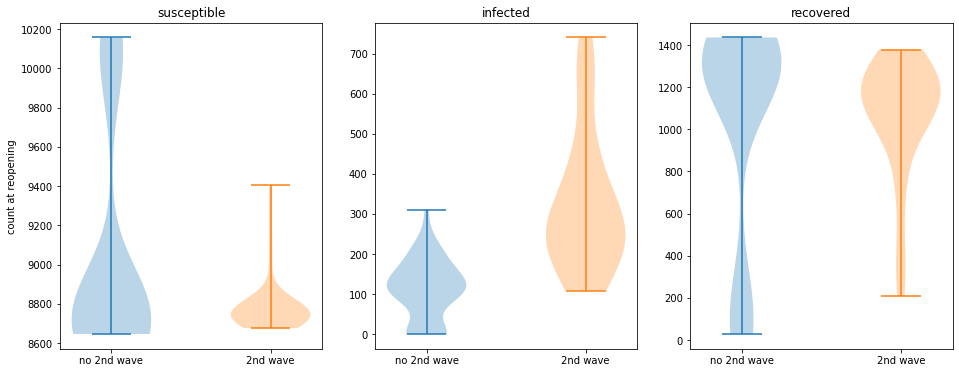

In [37]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
labels = ['susceptible','infected','recovered']
for i,dist in enumerate([[sus_1,sus_2],[inf_1,inf_2],[rec_1,rec_2]]):
    axs[i].violinplot(dist[0], positions=[0])
    axs[i].violinplot(dist[1], positions=[1])
    axs[i].set_title(labels[i])
    axs[i].set_xticklabels(['no 2nd wave', '2nd wave'])
    axs[i].set_xticks([0,1])
    
axs[0].set_ylabel('count at reopening')
    
fig.savefig('statii_distributions_at_reopening')

In [38]:
sus_1 = []
sus_2 = []
inf_1 = []
inf_2 = []
rec_1 = []
rec_2 = []
timepoint = 200

for file in input_files[:]:
    tdf = pd.read_pickle('analysis_temp/TIMES_'+file)
    
    # sus
    tdf_sus = tdf[(tdf['infection_time'].isna()) | (tdf['infection_time']>timepoint)]
    
    # inf
    tdf_inf = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<timepoint)]
    tdf_inf = tdf_inf[tdf_inf['recovery_time']>timepoint]
    tdf_inf = tdf_inf[(tdf_inf['death_time'].isna()) | (tdf_inf['death_time']>timepoint)]
    
    # rec
    tdf_rec = tdf[tdf['recovery_time']<=timepoint]
    
    
    if tdf['infection_time'].isna().sum()>4000:
        sus_1.append(len(tdf_sus.index))
        inf_1.append(len(tdf_inf.index))
        rec_1.append(len(tdf_rec.index))
    else:
        sus_2.append(len(tdf_sus.index))
        inf_2.append(len(tdf_inf.index))
        rec_2.append(len(tdf_rec.index))

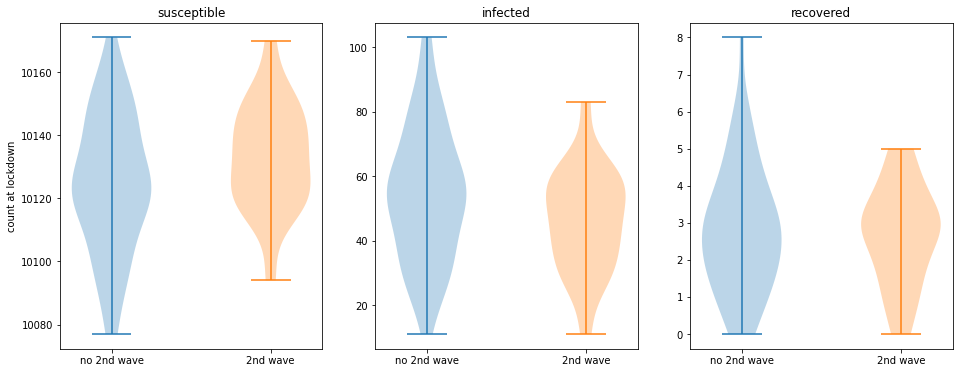

In [39]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
labels = ['susceptible','infected','recovered']
for i,dist in enumerate([[sus_1,sus_2],[inf_1,inf_2],[rec_1,rec_2]]):
    axs[i].violinplot(dist[0], positions=[0])
    axs[i].violinplot(dist[1], positions=[1])
    axs[i].set_title(labels[i])
    axs[i].set_xticklabels(['no 2nd wave', '2nd wave'])
    axs[i].set_xticks([0,1])
    
axs[0].set_ylabel('count at lockdown')
    
fig.savefig('statii_distributions_at_lockdown')

In [28]:
# Infectivity over time

In [68]:
infectivities_left_1 = []
variance_1 = []
infectivities_left_2 = []
variance_2 = []
tps = np.arange(501,573,1)

for file in input_files[:]:
    temp_inf_1 = []
    temp_var_1 = []
    temp_inf_2 = []
    temp_var_2 = []
    if tdf['infection_time'].isna().sum()>4000:
        one_wave=True
    else:
        one_wave=False
    for tp in tps:
        tdf = pd.read_pickle('analysis_temp/TIMES_'+file)

        tdf_short = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<tp)]
        tdf_short = tdf_short[tdf_short['recovery_time']>tp]
        tdf_short = tdf_short[(tdf_short['death_time'].isna()) | (tdf_short['death_time']>tp)]

        tdf_short.drop(columns=['recovery_time','death_time'])

        tdf_short['duration_at_tp']=tdf_short.apply(lambda x: tp-x['infection_time'], axis=1)
        tdf_short['infectivity_at_tp']=tdf_short.apply(lambda x: infectivity_dict[int(x['duration_at_tp'])], axis=1)

        if one_wave:
            #print(tdf['infection_time'].isna().sum())
            temp_inf_1.append(tdf_short['infectivity_at_tp'].sum()/len(tdf_short.index))
            temp_var_1.append(tdf_short.var()['infectivity_at_tp'])
        else:
            temp_inf_2.append(tdf_short['infectivity_at_tp'].sum()/len(tdf_short.index))
            temp_var_2.append(tdf_short.var()['infectivity_at_tp'])
    if one_wave:
        infectivities_left_1.append(temp_inf_1)
        variance_1.append(temp_var_1)
    else:
        infectivities_left_2.append(temp_inf_2)
        variance_2.append(temp_var_2)

In [69]:
infectivities_left_1 = np.array(infectivities_left_1)
infectivities_left_2 = np.array(infectivities_left_2)
variance_1 = np.array(variance_1)
variance_2 = np.array(variance_2)

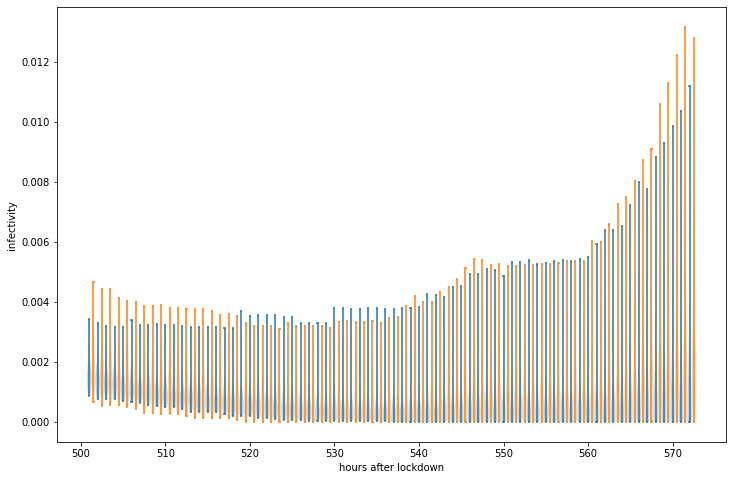

In [77]:
fig = plt.figure(figsize=(12,8))

plt.violinplot(infectivities_left_1, positions=tps)
plt.violinplot(infectivities_left_2, positions=tps+0.5)

plt.xlabel('hours after lockdown')
plt.ylabel('infectivity')

fig.savefig('infectivity_over_time_after_lockdown')

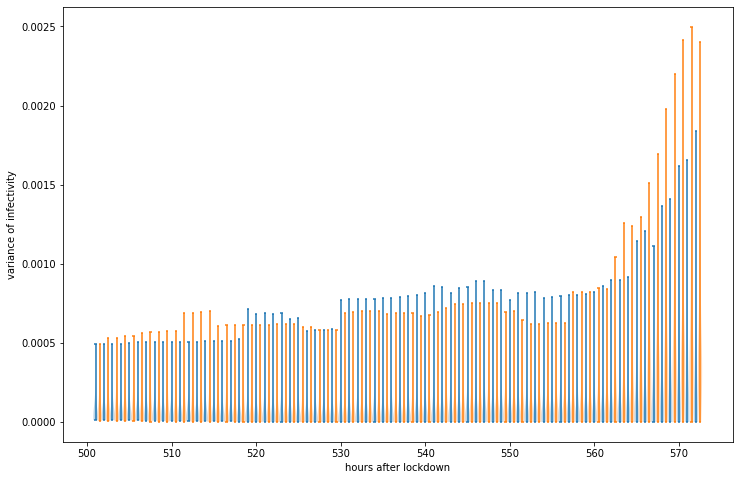

In [78]:
fig = plt.figure(figsize=(12,8))

plt.violinplot(variance_1, positions=tps)
plt.violinplot(variance_2, positions=tps+0.5)

plt.xlabel('hours after lockdown')
plt.ylabel('variance of infectivity')

fig.savefig('infectivity_variance_over_time_after_lockdown')